In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal

### Impulse Signal
The impulse function is a very short pulse (in theory, infinitely short) used to evaluate system dynamics. In the real world, an impulse function is a pulse that is much shorter than the time response of the system. The measure of an impulse is the area under the curve because it's amplitude tends to infinity.

Text(0, 0.5, 'Amplitudes')

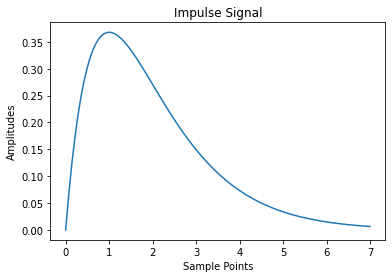

In [5]:
#Compute the impulse response of a second order system with a repeated root: x''(t) + 2*x'(t) + x(t) = u(t)
system = ([1.0], [1.0, 2.0, 1.0])
t, y = signal.impulse(system)
plt.plot(t, y)
plt.title("Impulse Signal")
plt.xlabel("Sample Points")
plt.ylabel("Amplitudes")


### Unit Impulse
Unit impulse is an elementary signal with zero amplitude everywhere except at n = 0 and has a unit area.

Text(0, 0.5, 'Amplitudes')

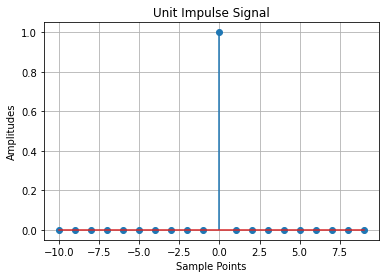

In [12]:
sample = np.arange(-10,10)
len = np.size(sample)
impulse = np.zeros(len)
idx = np.where(sample == 0)
impulse[idx] = 1
plt.stem(sample,impulse)
plt.grid(True)
plt.title("Unit Impulse Signal")
plt.xlabel("Sample Points")
plt.ylabel("Amplitudes")

###  Ramp Signal
 A signal whose magnitude increases same as time . It can be obtained by integrating unit step.

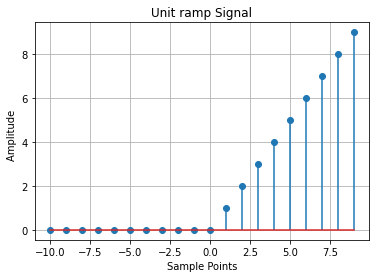

In [16]:

n = np.arange(-10,10)
y = []
l = np.size(n)
for i in range(l):
    temp = (n[i] if n[i]>=0 else 0)
    y.append(temp)
    
# print(list(n))
# print(y)

#Plotting the graph
plt.stem(n, y)
plt.xlabel('Sample Points')
plt.ylabel('Amplitude  ')
plt.title('Unit ramp Signal')
plt.grid(True)
plt.show()

### Exponential Signal
The “exponential” signal represents an exponentially increasing or falling series


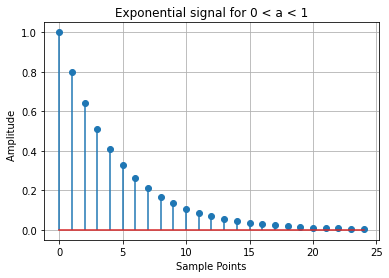

In [23]:
a = .8
n = np.arange(0,25)
y = []
l = np.size(n)
for i in range(l):
    temp = a**n[i]
    y.append(temp)
    

#Plotting the graph
plt.stem(y)
plt.xlabel('Sample Points')
plt.ylabel('Amplitude  ')
plt.title('Exponential signal for 0 < a < 1')
plt.grid(True)
plt.show()

### Compute the linear convolution of two signals
Convolution is a mathematical operation used to express the relation between input and output of an LTI system. It relates input, output and impulse response of an LTI system as

![alt](https://i.imgur.com/rnQG4Qv.png)

Linear convolution using convolution sum formula output response y =
 [-12.  -4.  -5. -13. -24.  -4. -11. -11. -12.]
Linear convolution using NumPy built-in function output response y=
 [-12  -4  -5 -13 -24  -4 -11 -11 -12]
Do both return same outputs?:  True


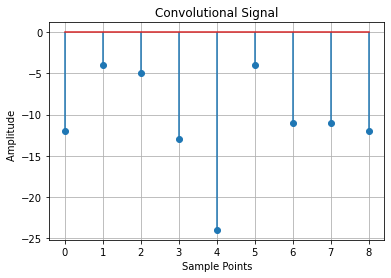

In [89]:
h = np.random.randint(-5,3,5)
x = np.random.randint( 0,  9, 5)
N1 = np.size(x)
N2 = np.size(h)
N = N1+N2-1
y = np.zeros(N)

#Linear convolution using built-in function in NumPy
y1 = np.convolve(x,h)
m = N-N1
n = N-N2
#Padding zeros to x and h to make their length to N
x =np.pad(x,(0,m),'constant')
h =np.pad(h,(0,n),'constant')

#Linear convolution using convolution sum formula
for n in range (N):
    for k in range (N):
        if n >= k:
             y[n] = y[n]+x[n-k]*h[k]
         

print('Linear convolution using convolution sum formula output response y =\n',y)
print('Linear convolution using NumPy built-in function output response y=\n',y1)

print("Do both return same outputs?: ", np.allclose(y, y1))

plt.stem(y)
plt.xlabel('Sample Points')
plt.ylabel('Amplitude  ')
plt.title('Convolutional Signal')
plt.grid(True)
plt.show()


### Compute the cross-correlation sequence of two signals x(n) and h(n).
In signal processing, cross-correlation is a measure of similarity of two series as a function of the displacement of one relative to the other. This is also known as a sliding dot product or sliding inner-product. It is commonly used for searching a long signal for a shorter, known feature.
(where ⋆ denotes the complex conjugate.)

![alt text](https://i.imgur.com/kJK8t9P.png)

Auto correlation using NumPy correlation built-in function - correlation result  y=
 [ 16 -24 -48 -20 -56 -68 -56 -12 -40]
correlation using formula - correlation result y =
 [ 16. -24. -48. -20. -56. -68. -56. -12. -40.]
Do both return same outputs?:  True


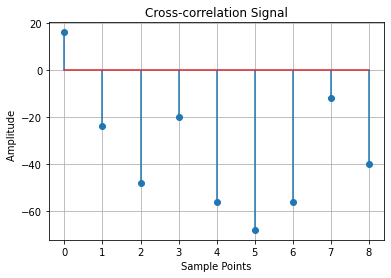

In [90]:
x = np.random.randint(-5,3,5)
h = np.random.randint( 0,  9, 5)
N1 = np.size(x)
N2 = np.size(h)
N = N1+N2-1
y = np.zeros(N)
for i in range (N2):
    h[N2-1-i]=h[i]
    


m = N-N1
n = N-N2
#Padding zeros to x and h to make their length to N
x =np.pad(x,(0,m),'constant')
h =np.pad(h,(0,n),'constant')
#Correlation using Correlation built-in function in NumPY
y1 = np.correlate(x,h,'same')

print('Auto correlation using NumPy correlation built-in function - correlation result  y=\n',y1)
#correlation using formula
for n in range (N):
    for k in range (N):
        if n >= k:
             y[n] = y[n]+x[n-k]*h[k]
         

print('correlation using formula - correlation result y =\n',y)
print("Do both return same outputs?: ", np.allclose(y, y1))

plt.stem(y)
plt.xlabel('Sample Points')
plt.ylabel('Amplitude  ')
plt.title('Cross-correlation Signal')
plt.grid(True)
plt.show()

### Determine the autocorrelation sequence of the signal x(n).
This is a type of correlation in which the given signal is correlated with itself, usually the time-shifted version of itself.

![alt text](https://i.imgur.com/kgusEaz.png)

Auto correlation using NumPy correlation built-in function - correlation result  y=
 [ 0 25 -5 -7 55 -7 -5 25  0]
correlation using formula - correlation result y =
 [ 0. 25. -5. -7. 55. -7. -5. 25.  0.]
Do both return same outputs?:  True


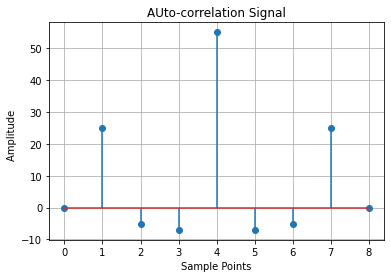

In [20]:
x = np.random.randint(-5,3,5)
N1 = np.size(x)
h = np.zeros(N1)
N2 = np.size(x)
N = N1+N2-1
y = np.zeros(N)
for i in range (N1):
    h[N1-1-i]=x[i]


#Correlation using Correlation built-in function in NumPY
y1 = np.correlate(x,x,'full')

m = N-N1
n = N-N2
#Padding zeros to x and h to make their length to N
x =np.pad(x,(0,m),'constant')
h =np.pad(h,(0,n),'constant')

#correlation using formula
for n in range (N):
    for k in range (N):
        if n >= k:
             y[n] = y[n]+x[n-k]*h[k]
         
print('Auto correlation using NumPy correlation built-in function - correlation result  y=\n',y1)

print('correlation using formula - correlation result y =\n',y)
print("Do both return same outputs?: ", np.allclose(y, y1))

plt.stem(y)
plt.xlabel('Sample Points')
plt.ylabel('Amplitude  ')
plt.title('AUto-correlation Signal')
plt.grid(True)
plt.show()

### Compute Discrete Fourier Transform (DFT) of a signal using DFT equation.
Fourier analysis is fundamentally a method for expressing a function as a sum of periodic components, and for recovering the function from those components. When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT). It  is a mathematical technique used to convert temporal or spatial data into frequency domain data. 

![alt text](https://i.imgur.com/EU9uaTy.png)


In [12]:
def DFT_iterative(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

Do both function and library return the same outputs?:  True


Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

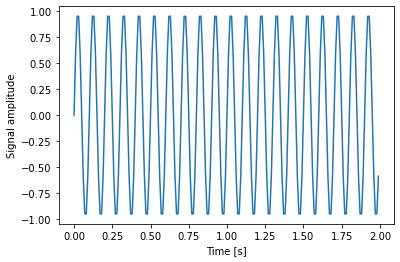

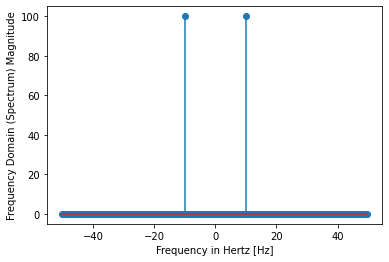

In [10]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t) # Sample, sinusoidal signal
X= DFT_iterative(x)
print("Do both function and library return the same outputs?: ",np.allclose(DFT_iterative(x), np.fft.fft(x)))

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude')


# X = fftpack.fft(x)
freqs = np.fft.fftfreq(np.size(x)) * f_s
fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
# ax.set_xlim(-f_s / 2, f_s / 2)
# ax.set_ylim(-5, 110)

### Inverse DFT 
![alt](https://i.imgur.com/lvYycla.png)

In [12]:
def IDFT_iterative(points):
    inversed_points = []
    N = len(points)

    for k in range(0, N):
        s = 0.0
        for n in range(0, N - 1):
            s += points[n]*np.exp(1.j*2.0*np.pi*k*n/N)
        inversed_points.append(s)
        
    return np.divide(inversed_points,N)


In [20]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t) # Sample, sinusoidal signal


# print("--------------ORIGINAL SIGNAL--------------------")
# print(x[:5])
# print("--------------DFT OF SIGNAL--------------------")
val = DFT_iterative(x)
# print(val[:5])
# print("--------------IFT OF SIGNAL WITH EQUATION--------------------")
val_i = IDFT_iterative(val)
# print(val_i[:5])
# print("--------------IFT OF SIGNAL WITH LIBRARY--------------------")
val_i_sc = np.fft.ifft(val)
# print(val_i_sc[:5])

print("Do both function and library return the same outputs?: ",np.allclose(val_i, val_i_sc))

Do both function and library return the same outputs?:  True


### By means of the DFT and IDFT, determine the response of the FIR filter with impulse response h(n) to the input sequence x(n).
At first, we calculate the DFT of the input and impulse response, respectively as X(k) and H(k). Then we multiply these two values to obtain Y(k). Finally, we calculat y(n) = IDFT (Y(k)), which is our answer.

In [6]:
x = np.array([1,2,2, 1])
h = np.array([1,2,3])
N1 = np.size(x)
N2 = np.size(h)
N = N1+N2 - 1
y = np.zeros(N)
m = N-N1
n = N-N2
#Padding zeros to x and h to make their length to N
x =np.pad(x,(0,m),'constant')
h =np.pad(h,(0,n),'constant')
X_k = DFT_iterative(x)
H_k = DFT_iterative(h)
print("X_k: ",X_k)
print("-----------------------------")
print("H_k: ",H_k)
print("-----------------------------")
Y_k = np.multiply(X_k, H_k)
print("Y_k: ",Y_k)
print("-----------------------------")
y = IDFT_iterative(Y_k)
print("-----------------------------")
print(y)
print("------------------------------------------------------------------------")

X_ = np.fft.fft(x)
print("X_k: ",X_)
print("-----------------------------")

H_ = np.fft.fft(h)
print("H_k: ",H_)
print("-----------------------------")

Y_ = np.multiply(X_,H_)
print("Y_k: ",Y_)
print("-----------------------------")

y_ = np.fft.ifft(Y_)
print(y_)


NameError: name 'DFT_iterative' is not defined

### Compute the Fast Fourier Transform (FFT) using divide and conquer approach (e.g N=2 x N/2).

In [82]:
def FFT_dnc(f):
    n = len(f)
    if n==1:
        return [f[0]] # base case

    F = n*[0] 
    f_even = f[0::2] # Divide – even subproblem.
    f_odd = f[1::2] # “ - odd subproblem
    F_even = FFT_dnc(f_even) # recursive call
    F_odd = FFT_dnc(f_odd) # “
    n2 = int(n/2) # Prepare to combine results
    for i in range(n2):
        twiddle = np.exp(-2*np.pi*1j*i/n) 
        oddTerm = F_odd[i] * twiddle # Odd terms need an adjustment
        F[i] = F_even[i] + oddTerm # Compute a new term
        F[i+n2] = F_even[i] - oddTerm # Compute one more new term
    return F

In [83]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 4  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t) # Sample, sinusoidal signal
X= DFT_iterative(x)
print(np.real_if_close(X[:5]))
XX = FFT_dnc(x)
print(np.real_if_close(XX[:5]))


[-1.10342008e-15  4.96144153e-15  9.55472096e-15 -6.28543356e-17
 -2.78031962e-14]
[-1.10342008e-15  4.96144153e-15  9.55472096e-15 -6.28543356e-17
 -2.78031962e-14]


### Compute the FFT of a given signal with N = 8 using Radix-2 algorithm.

In [86]:
def FFT_rad(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 8:  
        return DFT_iterative(x)
    else:
        X_even = FFT_rad(x[::2])
        X_odd = FFT_rad(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N / 2] * X_odd,
                               X_even + factor[N / 2:] * X_odd])